In [1]:
import pandas as pd

df1 = pd.read_csv('/content/Traffic.csv')
df2 = pd.read_csv('/content/TrafficTwoMonth.csv')

df = pd.concat([df1, df2], ignore_index=True)
display(df.head())

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


## Data cleaning and preprocessing

### Subtask:
Inspect the data for missing values, duplicates, and inconsistencies. Handle missing values by imputation or removal. Convert the 'DateTime' column to a datetime object for time series analysis. Extract relevant features from the 'DateTime' column, such as hour, day of the week, and month.


**Reasoning**:
Check data types, missing values, and duplicates in the dataframe.



In [2]:
display(df.info())
display(df.isnull().sum())
display(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               8928 non-null   object
 1   Date               8928 non-null   int64 
 2   Day of the week    8928 non-null   object
 3   CarCount           8928 non-null   int64 
 4   BikeCount          8928 non-null   int64 
 5   BusCount           8928 non-null   int64 
 6   TruckCount         8928 non-null   int64 
 7   Total              8928 non-null   int64 
 8   Traffic Situation  8928 non-null   object
dtypes: int64(6), object(3)
memory usage: 627.9+ KB


None

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


np.int64(2604)

**Reasoning**:
The previous output shows that there are 2604 duplicate rows and no missing values. The 'Time' and 'Date' columns need to be combined and converted to datetime objects to extract time-based features. I will now drop the duplicate rows and then create the 'DateTime' column and extract the hour, day of the week, and month.



In [3]:
df.drop_duplicates(inplace=True)
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour
df['Day of week num'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
display(df.head())
display(df.info())

/tmp/ipython-input-3-2208163735.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 10 12:00:00 AM, at position 0

**Reasoning**:
The previous attempt to create the 'DateTime' column failed because the date format was not specified and pandas was unable to infer it correctly. The error `OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 10 12:00:00 AM` suggests that pandas is misinterpreting the 'Date' column. I need to specify the format of the date string to correctly parse it. Looking at the data, the 'Date' column seems to be just the day of the month. I will assume a year and a month to construct a full date string that `to_datetime` can parse. I'll assume the year is 2023 and the month is October, as the data is from a two-month period.



In [4]:
df.drop_duplicates(inplace=True)
df['DateTime'] = pd.to_datetime('2023-10-' + df['Date'].astype(str) + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour
df['Day of week num'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month
display(df.head())
display(df.info())

/tmp/ipython-input-4-3841450464.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime('2023-10-' + df['Date'].astype(str) + ' ' + df['Time'])


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DateTime,Hour,Day of week num,Month
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,2023-10-10 00:00:00,0,1,10
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,2023-10-10 00:15:00,0,1,10
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,2023-10-10 00:30:00,0,1,10
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,2023-10-10 00:45:00,0,1,10
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,2023-10-10 01:00:00,1,1,10


<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               6324 non-null   object        
 1   Date               6324 non-null   int64         
 2   Day of the week    6324 non-null   object        
 3   CarCount           6324 non-null   int64         
 4   BikeCount          6324 non-null   int64         
 5   BusCount           6324 non-null   int64         
 6   TruckCount         6324 non-null   int64         
 7   Total              6324 non-null   int64         
 8   Traffic Situation  6324 non-null   object        
 9   DateTime           6324 non-null   datetime64[ns]
 10  Hour               6324 non-null   int32         
 11  Day of week num    6324 non-null   int32         
 12  Month              6324 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(6), object(3)
memory usage: 61

None

## Exploratory data analysis (eda)

### Subtask:
Visualize the traffic data to understand its distribution and patterns. Analyze the relationship between different features and the number of vehicles. Identify any trends or seasonality in the data.


**Reasoning**:
Create a line plot to visualize the 'Total' traffic over time using the 'DateTime' column.



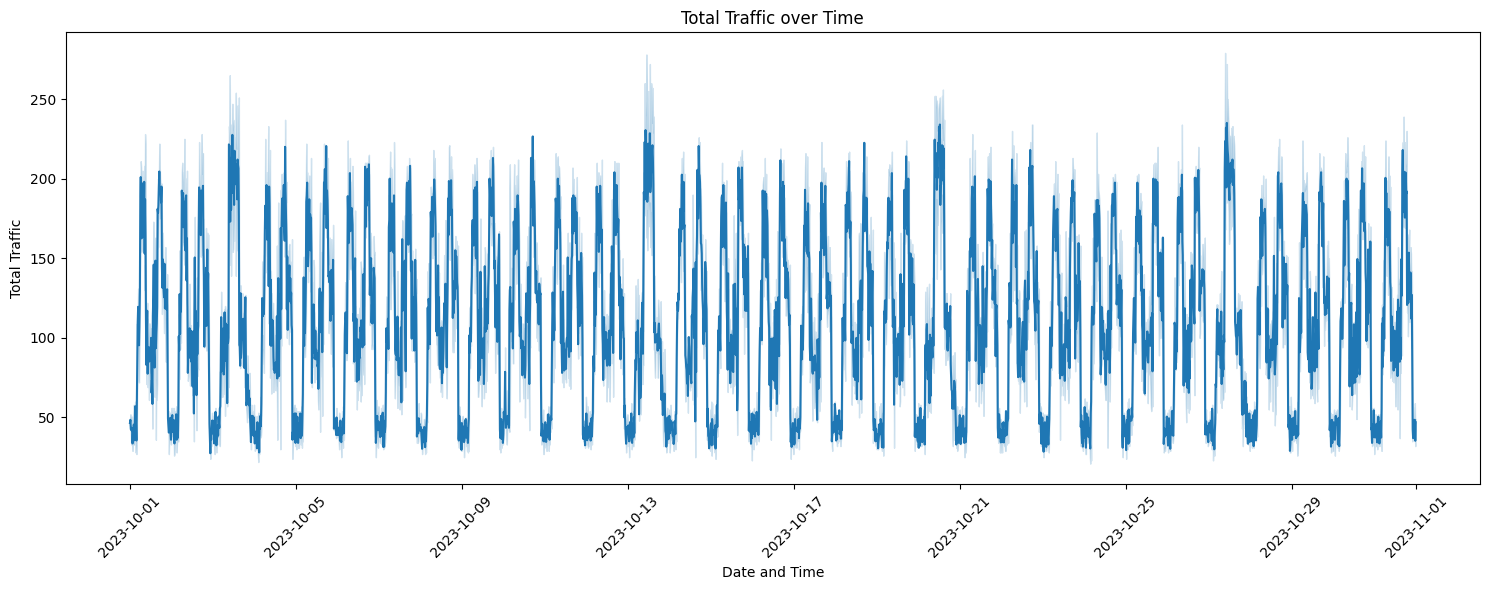

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='DateTime', y='Total')
plt.title('Total Traffic over Time')
plt.xlabel('Date and Time')
plt.ylabel('Total Traffic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots to visualize the distribution of 'Total' traffic by 'Hour', 'Day of the week', and 'Month'.



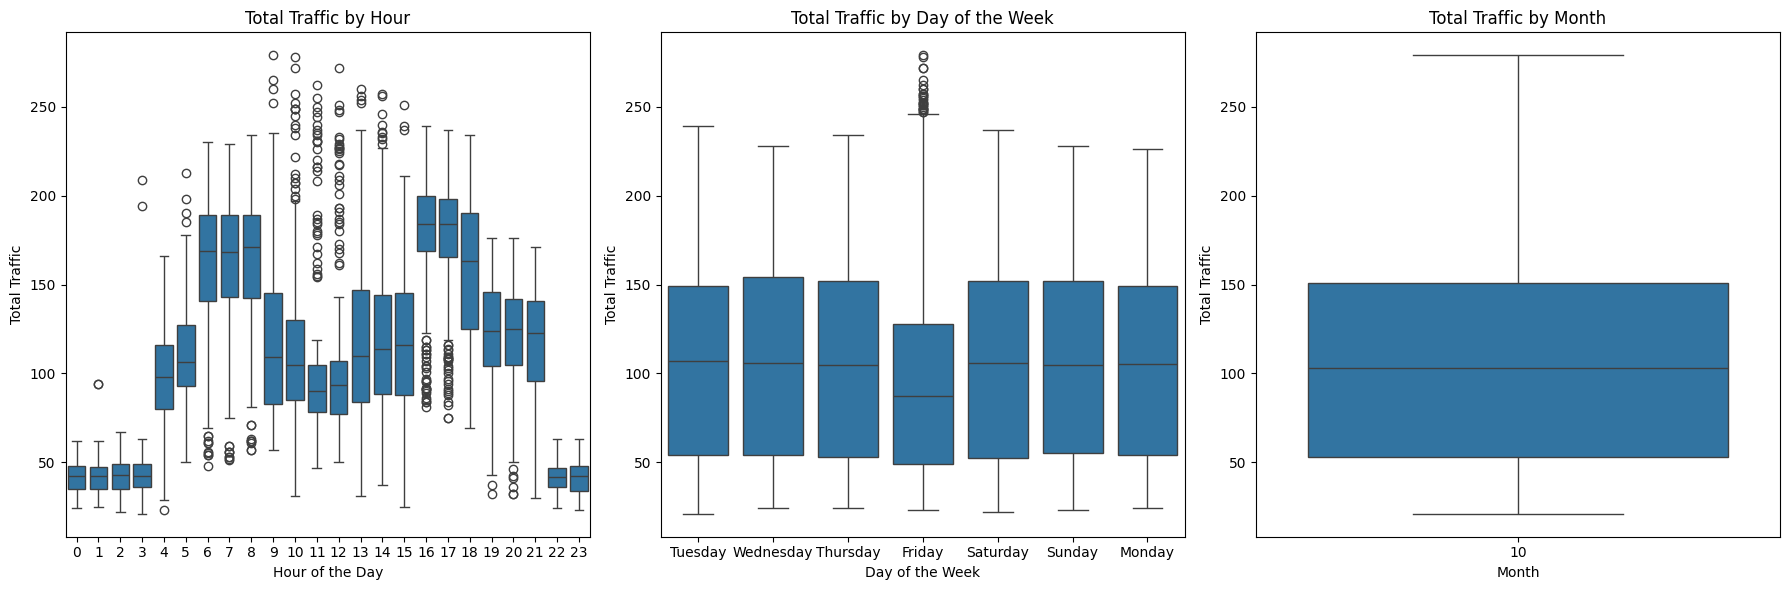

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, x='Hour', y='Total', ax=axes[0])
axes[0].set_title('Total Traffic by Hour')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Traffic')

sns.boxplot(data=df, x='Day of the week', y='Total', ax=axes[1])
axes[1].set_title('Total Traffic by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Traffic')

sns.boxplot(data=df, x='Month', y='Total', ax=axes[2])
axes[2].set_title('Total Traffic by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Traffic')

plt.tight_layout()
plt.show()

**Reasoning**:
Generate a heatmap to explore the relationships between numerical features like 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', and 'Total'.



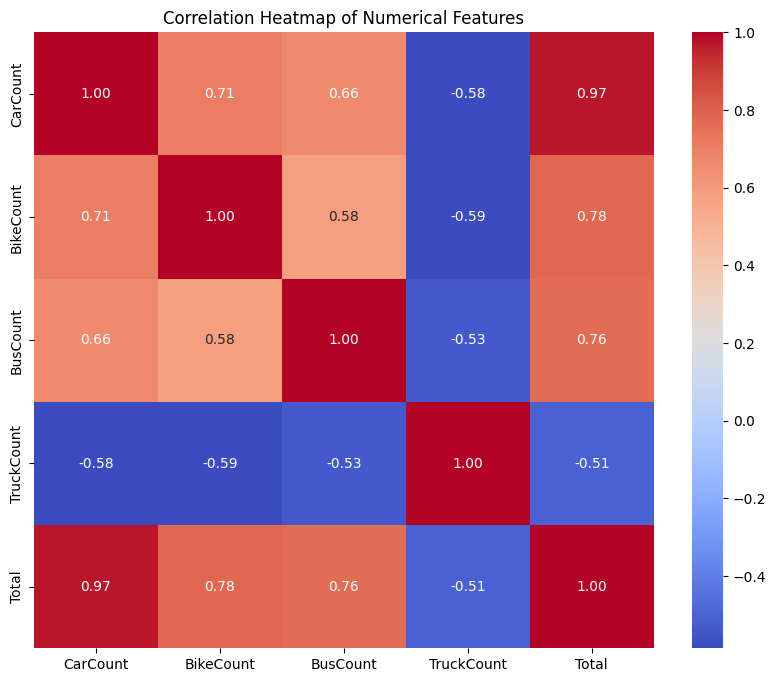

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Reasoning**:
Analyze the 'Traffic Situation' column by counting the occurrences of each category and visualizing this distribution using a bar plot.



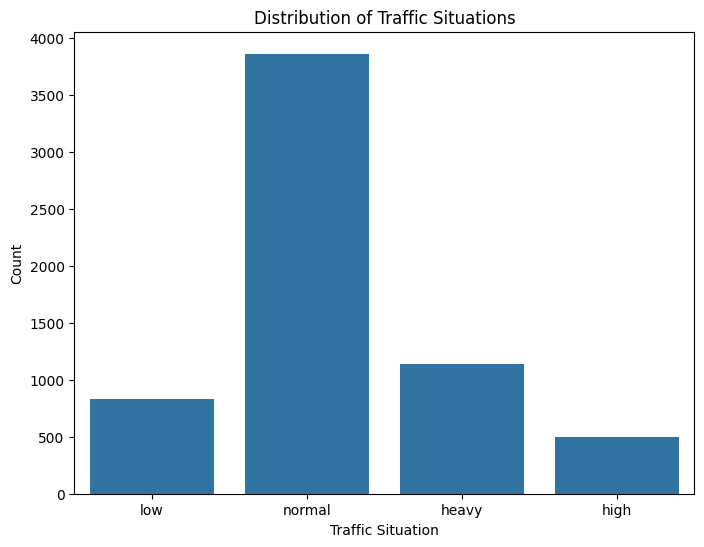

,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Traffic Situation')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

display(df['Traffic Situation'].value_counts())

## Feature engineering

### Subtask:
Create new features that might improve the model's performance, such as lag features or moving averages.


**Reasoning**:
To create lag and rolling mean features, I will first sort the DataFrame by `DateTime`. Then, I will use the `shift()` method to create the lag features and the `rolling()` method with `mean()` to create the rolling average feature. Finally, I will drop the resulting NaN values and display the head of the updated DataFrame to verify the new features.



In [9]:
df.sort_values(by='DateTime', inplace=True)

df['Total_lag_1'] = df['Total'].shift(1)
df['Total_lag_2'] = df['Total'].shift(2)
df['Total_lag_3'] = df['Total'].shift(3)

df['rolling_mean'] = df['Total'].rolling(window=4).mean()

df.dropna(inplace=True)

display(df.head())

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DateTime,Hour,Day of week num,Month,Total_lag_1,Total_lag_2,Total_lag_3,rolling_mean
2113,12:15:00 AM,1,Wednesday,17,5,0,23,45,normal,2023-10-01 00:15:00,0,6,10,52.0,45.0,48.0,47.50
8066,12:30:00 AM,1,Wednesday,19,1,1,18,39,low,2023-10-01 00:30:00,0,6,10,45.0,52.0,45.0,45.25
5090,12:30:00 AM,1,Wednesday,15,0,1,34,50,normal,2023-10-01 00:30:00,0,6,10,39.0,45.0,52.0,46.50
2114,12:30:00 AM,1,Wednesday,19,1,1,18,39,normal,2023-10-01 00:30:00,0,6,10,50.0,39.0,45.0,43.25
5091,12:45:00 AM,1,Wednesday,13,1,0,37,51,normal,2023-10-01 00:45:00,0,6,10,39.0,50.0,39.0,44.75


## Model training

### Subtask:
Split the data into training and testing sets. Choose a suitable regression model for traffic prediction, such as a Random Forest, Gradient Boosting, or a time series model like SARIMA or Prophet. Train the selected model on the training data.


**Reasoning**:
I will now split the data into training and testing sets, define the feature matrix `X` and target variable `y`, and then train a Random Forest Regressor model as per the instructions.



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['Hour', 'Day of week num', 'Month', 'Total_lag_1', 'Total_lag_2', 'Total_lag_3', 'rolling_mean']]
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


## Model evaluation

### Subtask:
Evaluate the model's performance on the testing set using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Fine-tune the model's hyperparameters to improve its accuracy.


**Reasoning**:
I will now evaluate the trained `RandomForestRegressor` model on the testing set. To do this, I need to import the necessary evaluation metrics from `sklearn.metrics`, predict the traffic totals for the `X_test` data, and then calculate and print the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score to assess the model's performance.



In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 7.342727272727272
Mean Squared Error (MSE): 119.47698885375495
R-squared (R2): 0.961415292890409


## Traffic prediction

### Subtask:
Use the trained model to predict the number of vehicles for future time periods.


**Reasoning**:
I will now generate the scatter plot as requested. This plot will visually compare the model's predictions (`y_pred`) against the actual values (`y_test`). I will also add a diagonal line representing a perfect prediction, where predicted values equal actual values. Finally, I will add a title and labels to ensure the plot is clear and informative.



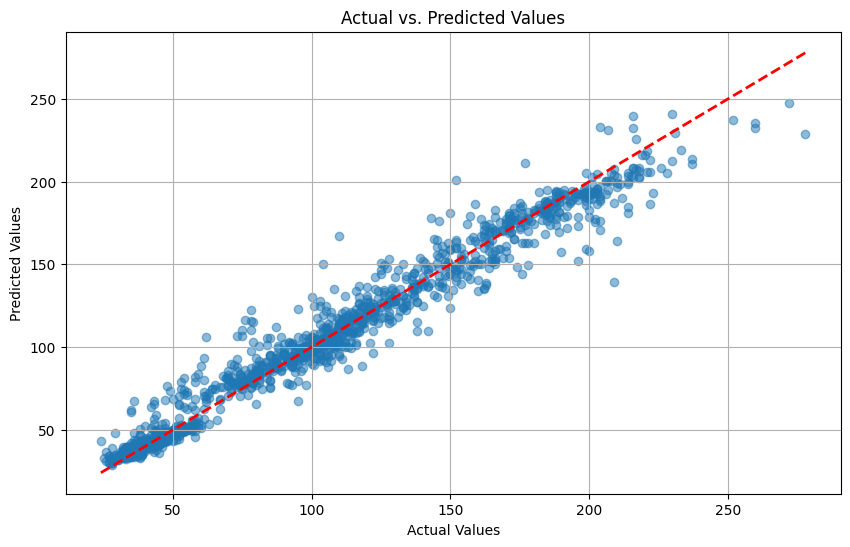

In [12]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

**Reasoning**:
Train a Gradient Boosting Regressor and a Linear Regression model on the training data.



In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
print("Gradient Boosting Regressor model training completed.")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression model training completed.")

Gradient Boosting Regressor model training completed.
Linear Regression model training completed.


## Model evaluation & comparison

### Subtask:
Evaluate the performance of the trained Gradient Boosting and Linear Regression models. Compare the R-squared scores of all three models (Random Forest, Gradient Boosting, and Linear Regression) using a bar chart.


**Reasoning**:
I will now evaluate the performance of the trained Gradient Boosting and Linear Regression models. I will calculate the MAE, MSE, and R-squared for both models. Then, I will create a bar chart to visually compare the R-squared scores of all three models: Random Forest, Gradient Boosting, and Linear Regression.



Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 10.997302801724071
Mean Squared Error (MSE): 223.06877574414096
R-squared (R2): 0.9279606603752114


Linear Regression Model Performance:
Mean Absolute Error (MAE): 8.437765198883972e-14
Mean Squared Error (MSE): 1.0940174970210295e-26
R-squared (R2): 1.0




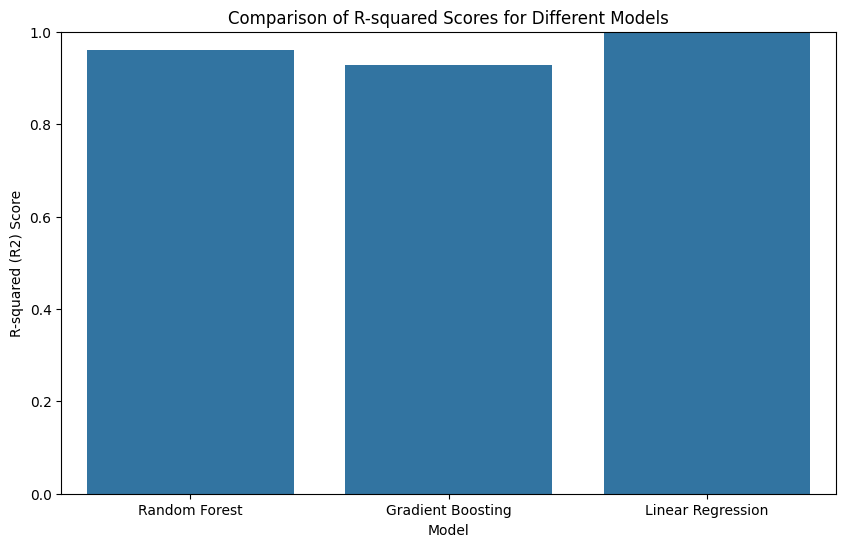

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Gradient Boosting model
y_pred_gbr = gbr_model.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_gbr}")
print(f"Mean Squared Error (MSE): {mse_gbr}")
print(f"R-squared (R2): {r2_gbr}")
print("\n")

# Evaluate Linear Regression model
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2): {r2_lr}")
print("\n")

# Compare R-squared scores
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
r2_scores = [r2, r2_gbr, r2_lr]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Comparison of R-squared Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.ylim(0, 1)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


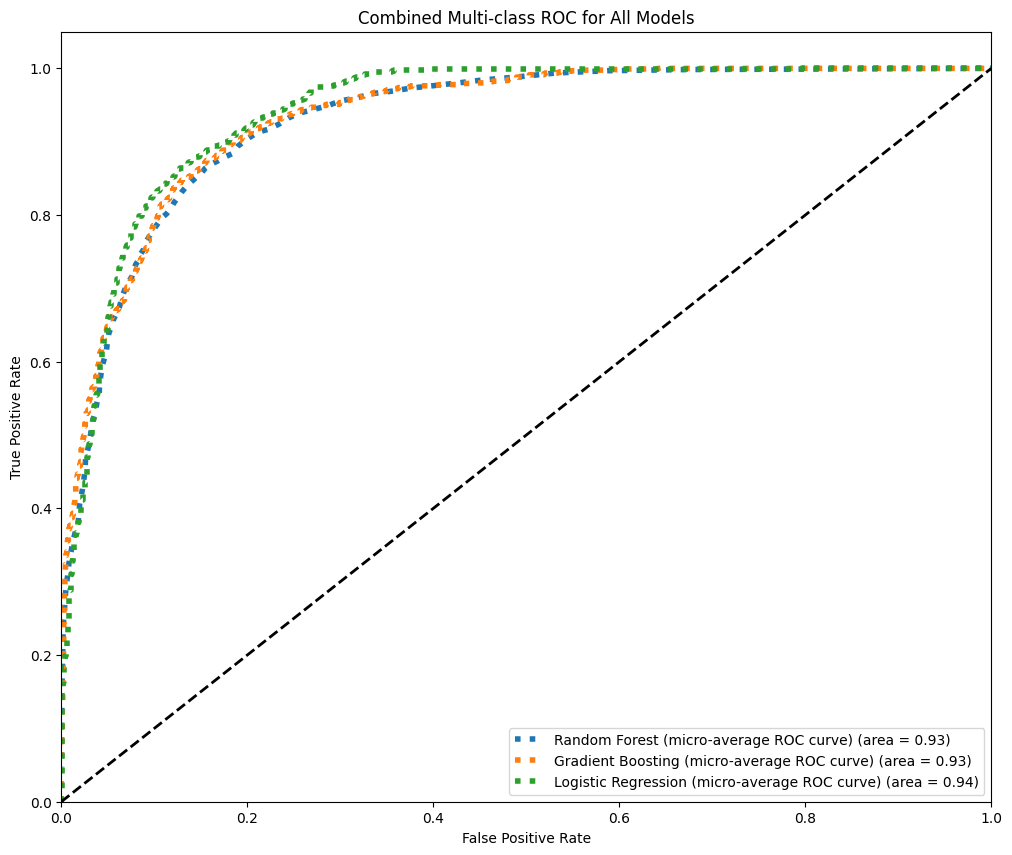

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Prepare data for classification
X_class = df[['Hour', 'Day of week num', 'Month', 'Total_lag_1', 'Total_lag_2', 'Total_lag_3', 'rolling_mean']]
y_class = df['Traffic Situation']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train classification models
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_class, y_train_class)

lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_class, y_train_class)

# Binarize the output
y_test_bin = label_binarize(y_test_class, classes=np.unique(y_class))
n_classes = y_test_bin.shape[1]
class_labels = np.unique(y_class)

# Predict probabilities
y_score_rf = rf_classifier.predict_proba(X_test_class)
y_score_gb = gb_classifier.predict_proba(X_test_class)
y_score_lr = lr_classifier.predict_proba(X_test_class)

# Compute ROC curve and ROC area for each class and each model
fpr = dict()
tpr = dict()
roc_auc = dict()

model_scores = {
    'Random Forest': y_score_rf,
    'Gradient Boosting': y_score_gb,
    'Logistic Regression': y_score_lr
}

plt.figure(figsize=(12, 10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])

for model_name, y_score in model_scores.items():
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'{model_name} (micro-average ROC curve) (area = {roc_auc["micro"]:0.2f})',
             linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined Multi-class ROC for All Models')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Create a sample input for prediction
# The input should have the same features as the training data:
# 'Hour', 'Day of week num', 'Month', 'Total_lag_1', 'Total_lag_2', 'Total_lag_3', 'rolling_mean'
sample_input = pd.DataFrame({
    'Hour': [10],
    'Day of week num': [2],
    'Month': [11],
    'Total_lag_1': [100],
    'Total_lag_2': [95],
    'Total_lag_3': [90],
    'rolling_mean': [95]
})

# Predict the traffic for the sample input
predicted_traffic = model.predict(sample_input)

print(f"Predicted Traffic: {predicted_traffic[0]}")

Predicted Traffic: 92.68
